# 1. 数据整理
    - 把所有有GitHub的记者所在地址加入 Github_Analysis.csv
    - 从这些里面再筛选出所有美国记者

In [192]:
import pandas as pd
df = pd.read_csv('Data_Journalism.csv')
dfs = pd.read_csv('Github_Analysis.csv')

In [255]:
# 这里不封函数了 但是说明另外一个问题 以后爬数据不能偷懒 其他信息最好一起写进去 不然整理起来太麻烦
Location = []
for i in df['Name']: # 有地点的df
    for n in dfs['Name']: # 没有地点的dfs
        if i == n:
            L = df[df['Name']==i]['Location'].tolist()[0] # 变成str再写进list 然后再写进去DataFrame
            Location.append(L) 
            
# 把地点和有GitHub的记者一一对应起来
dfs.insert(0, 'Location', Location)

In [263]:
# 清理出所有的美国的信息，去掉其他的 并写成DataFrame

for i in dfs['Location']:
    if 'United States' not in i:
        number = dfs[dfs['Location'] == i]['Unnamed: 0'].tolist()[0] # 运用index定位
        dfs.drop([number], inplace=True)

In [306]:
dfs.head()

,Location,Unnamed: 0,Name,Times,Last_contributions,Wholeyear_contributions
0,"United States, Brooklyn (US-VA)",0,Justin Myers,40,2018-09-08,155
5,"Willits, United States",5,Michael Mott,0,2018-09-04,95
6,"New Orleans, United States",6,Troy Thibodeaux,2,2018-10-14,3
7,"Eugene, United States",7,John Heasly,76,2018-11-05,198
9,"San Francisco, United States",9,Jeremia Kimelman,67,2018-10-21,230


# 2. 数据可视化
    - 统计美国城市的数量
    - 统计所有美国城市 在GitHub上编程天数的平均值

In [309]:
from matplotlib import pyplot as plt
country_counts = pd.DataFrame(dfs['Location'].value_counts()[:10])
country = pd.DataFrame(country_counts)

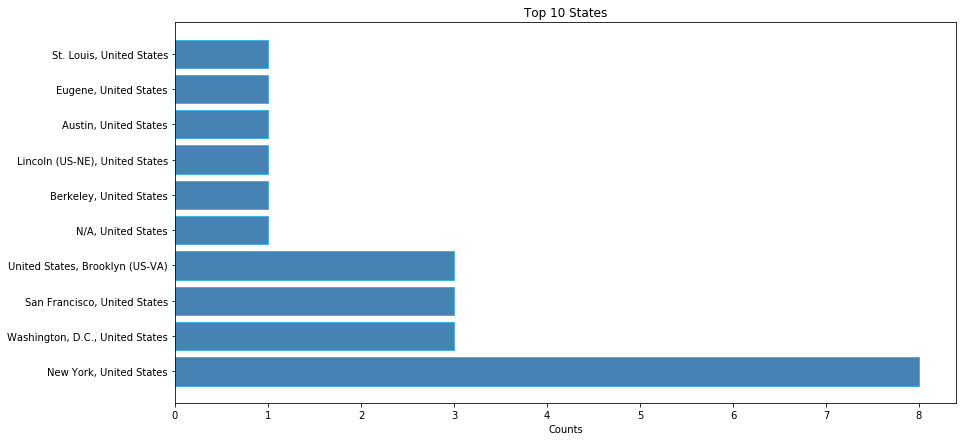

In [310]:
fig = plt.figure(figsize=(14,7)) #adjust size
plt.barh(country.index, country.Location,color = 'steelblue',edgecolor = '#40b4e5') #change color of the bars
plt.title('Top 10 States') #plot title and label name
plt.xlabel('Counts')
# plt.ylabel('counts')
plt.show()

# 纽约独占鳌头 再来看看contribution的平均值

In [270]:
import plotly
import plotly.graph_objs as go

In [275]:
pd_df2 = dfs.groupby(['Location'])['Times'].mean().reset_index().sort_values("Times",ascending=False)
data = [go.Bar(x=pd_df2.Location,
            y=pd_df2.Times)]
plotly.offline.plot(data, filename='country_with_average_like_bar')
# 这个图在jupyter notebook上看不到 我单独放到文件夹里了

/Users/lichenxi/venv/lib/python3.6/site-packages/plotly/offline/offline.py:608: UserWarning:

Your filename `country_with_average_like_bar` didn't end with .html. Adding .html to the end of your file.



'file:///Users/lichenxi/Assignment/country_with_average_like_bar.html'

In [ ]:
# 很有趣的是 最大mean居然不是New York 原来纽约记者有GitHub的虽然多，但是很多人每年的编程天数并不高 所以mean的值并不高
# 但是Chicago一个老哥就干了160天 没有人拖后腿 所以一支独秀了
# 从这个角度再来看，突然发现美国的数据新闻记者虽然多，但是其实GitHub contributions are not the most one, whether times or whole contributions